# Differential gene expression analysis

Exercise for analysing gene expression changes between conditions.

* **Contact:** mate.balajti@unibas.ch

#### Differential gene expression analysis

One of the most common experiment types making use of RNA-Seq is a differential
gene expression analysis where gene expression levels across different
conditions (e.g., healthy vs disease) or compared to each other. This type of
experiment is often the basis for discovering genes that are relevant to a
given physiological or disease process. Following this relatively open-ended
discovery phase of a study, a list of genes with a strikingly different
expression pattern is often the basis for further, more detailed mechanistic
studies.

Required files:

* Control mate 1: `control.mate_1.fq.gz` (from Exercise 2)
* Control mate 2: `control.mate_2.fq.gz` (from Exercise 2)
* Treated mate 1: `treated.mate_1.fq.gz`
* Treated mate 2: `treated.mate_2.fq.gz`

Procedure:

* Create a table of counts for each gene (rows) and sample (columns)
* Analyze gene expression across different conditions based on such a count
  table

#### Exercise 3.1: Align the treatment reads to the reference genome (2 points)

Align the treated sample’s paired-end FASTQ files to the reference genome with `STAR` (similarly to Exercise 2) to produce a sorted, indexed `BAM` suitable for counting. 

Required files:

* Genome index (same one used for control in Exercise 2, created from `Mus_musculus.GRCm38.dna_rm.chr19.fa.gz`)
* Annotation GTF (same one used for control in Exercise 2, `Mus_musculus.GRCm38.88.chr19.gtf.gz`)
* Treated reads: `treated.mate_1.fq.gz`, `treated.mate_2.fq.gz`

Run `STAR` on the treated read pair using the same parameters and genome index you used for control.

> When using STAR, ensure `--outSAMtype BAM SortedByCoordinate` to get sorted BAM files as output; otherwise sort after alignment (using `samtools`)

In [ ]:
# Start the docker container

# CMD: uses ^ for line continuation
docker run -it --rm ^
  -v "C:\Users\lucas\Desktop\School\Universität Basel\3. Semester - HS 2025\Programming in Bioinformatics 2025:/data" ^
  mgibio/star:latest ^
  bash

# my star version is: 
REPOSITORY               TAG              IMAGE ID       CREATED       SIZE
biocontainers/samtools   v1.9-4-deb_cv1   da61624fda23   5 years ago   985MB
mgibio/star              latest           e7d63332622d   6 years ago   1.19GB

# actually do everything from wsl
installed STAR 2.7.11b to Ubuntu

# Command

STAR \
  --runThreadN 4 \
  --genomeDir "/mnt/c/Users/lucas/Desktop/School/Universität Basel/3. Semester - HS 2025/Programming in Bioinformatics 2025/Exercise 2/MyIndex" \
  --readFilesIn "/mnt/c/Users/lucas/Desktop/School/Universität Basel/3. Semester - HS 2025/Programming in Bioinformatics 2025/Exercise 3/PI1_R1_t_chr19.fq" "/mnt/c/Users/lucas/Desktop/School/Universität Basel/3. Semester - HS 2025/Programming in Bioinformatics 2025/Exercise 3/PI1_R2_t_chr19.fq" \
  --sjdbGTFfile "/mnt/c/Users/lucas/Desktop/School/Universität Basel/3. Semester - HS 2025/Programming in Bioinformatics 2025/Exercise 2/Mus_musculus.GRCm38.88.chr19.gtf/Mus_musculus.GRCm38.88_chr19.gtf" \
  --outFileNamePrefix "/mnt/c/Users/lucas/Desktop/School/Universität Basel/3. Semester - HS 2025/Programming in Bioinformatics 2025/Exercise 3/Output treated/" \
  --outSAMtype BAM SortedByCoordinate

# need 2.7.4a
    Switch between versions: 

    Keep 2.7.11b in /usr/local/bin/STAR

    Keep 2.7.4a in ~/bin/star/STAR (or any folder)

    Call explicitly if needed:

    # Use 2.7.11b
    /usr/local/bin/STAR --version

    # Use 2.7.4a
    ~/bin/star/STAR --version

# Brruuuhhh now i need 2.7.0 digggaaa

    ~/bin/star/STAR-2.7.0d --version


# Statistics

local machine

Oct 05 11:33:55 ..... started STAR run
Oct 05 11:33:56 ..... loading genome
Oct 05 11:34:28 ..... processing annotations GTF
Oct 05 11:34:32 ..... inserting junctions into the genome indices
Oct 05 11:34:38 ..... started mapping
Oct 05 11:37:41 ..... finished mapping
Oct 05 11:37:43 ..... started sorting BAM
Oct 05 11:37:53 ..... finished successfully




In [ ]:
# 06.10 MB
# Good (2/2) 

#### Exercise 3.2: Generate gene-level counts (3 points)

Summarize aligned reads to gene counts for control and treated using the GTF annotation. 
Choose a counting tool: **featureCounts** (recommended) or HTSeq-count.

featureCounts is part of the [subread](https://subread.sourceforge.net/) package (available through [bioconda](https://anaconda.org/bioconda/subread)). 
Follow [featureCounts\' manual](https://subread.sourceforge.net/SubreadUsersGuide.pdf#section.6.2) to summarize the aligned reads from the `BAM` files into a gene × sample count table (rows = genes, columns = control, treated).

Input files:
* Output from Exercise 2 and 3.1: `control.sorted.bam`, `treated.sorted.bam`
* Annotation GTF: `Mus_musculus.GRCm38.88.chr19.gtf.gz`


> Ensure both BAMs are coordinate-sorted and indexed before counting.

> Note that we're dealing with paired-end reads, therefore you have to count _fragments_ instead of reads (`-p` and `--countReadPairs` params are required).

In [ ]:
### Copy your command here

featureCounts \
  -p \
  -T 4 \
  -a "/mnt/c/Users/lucas/Desktop/School/Universität Basel/3. Semester - HS 2025/Programming in Bioinformatics 2025/Exercise 2/Mus_musculus.GRCm38.88.chr19.gtf/Mus_musculus.GRCm38.88_chr19.gtf" \
  -o gene_counts_Ex_3.2.txt \
  "/mnt/c/Users/lucas/Desktop/School/Universität Basel/3. Semester - HS 2025/Programming in Bioinformatics 2025/Exercise 2/output/BAM/Aligned.sorted.bam" \
  "/mnt/c/Users/lucas/Desktop/School/Universität Basel/3. Semester - HS 2025/Programming in Bioinformatics 2025/Exercise 3/Output treated/Aligned.sortedByCoord.out.bam"


# Explanation
-p          like mentioned for counting fragments intead of reads
-T 4        4 threads
-a          GTF File
-o          output
controlBAM
treatedBAM

WLS Paths: 
"/mnt/c/Users..."

GTF
"C:\Users\lucas\Desktop\School\Universität Basel\3. Semester - HS 2025\Programming in Bioinformatics 2025\Exercise 2\Mus_musculus.GRCm38.88.chr19.gtf\Mus_musculus.GRCm38.88_chr19.gtf"
"/mnt/c/Users/lucas/Desktop/School/Universität Basel/3. Semester - HS 2025/Programming in Bioinformatics 2025/Exercise 2/Mus_musculus.GRCm38.88.chr19.gtf/Mus_musculus.GRCm38.88_chr19.gtf"

sorted
"/mnt/c/Users/lucas/Desktop/School/Universität Basel/3. Semester - HS 2025/Programming in Bioinformatics 2025/Exercise 2/output/BAM/Aligned.sorted.bam"

treated
"/mnt/c/Users/lucas/Desktop/School/Universität Basel/3. Semester - HS 2025/Programming in Bioinformatics 2025/Exercise 3/Output treated/Aligned.sortedByCoord.out.bam"

move output to folder
mv gene_counts_Ex_3.2.txt "/mnt/c/Users/lucas/Desktop/School/Universität Basel/3. Semester - HS 2025/Programming in Bioinformatics 2025/Exercise 3/Output 3.2"
mv gene_counts_Ex_3.2.txt.summary "/mnt/c/Users/lucas/Desktop/School/Universität Basel/3. Semester - HS 2025/Programming in Bioinformatics 2025/Exercise 3/Output 3.2"



In [ ]:
# 06.10 MB
# Correct (3/3)

#### Exercise 3.3: DESeq2 size-factor normalization (3 points)

Because we only have __1 control__ and __1 treated__ sample, we cannot estimate biological variance across replicates and therefore cannot perform reliable hypothesis testing. To keep the exercise scientifically grounded yet minimal, we will:

1. Implement DESeq2’s size-factor normalization
    - Compute the geometric mean per gene across samples (only genes with all non-zero counts)
    - For each sample, compute gene-wise ratios count / geometric mean
    - The size factor is the median of these ratios; divide raw counts by the size factor to obtain normalized counts

2. Rank genes by log2FC (and optionally by absolute log2FC)

3. Visualize the results
    - MA plot of (mean normalized count) vs (log2FC) for an effect-size view.

In a real analysis with adequate replication, these steps would be followed by __dispersion estimation__, __NB-GLM fitting__ under an appropriate design (accounting for covariates), __Wald/LRT__ testing with FDR control, and __LFC shrinkage__, plus thorough QC (PCA, dispersion plots, Cook’s/outlier checks). If you're interested, you can read more about DESeq2 [here](https://bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html).



In [4]:
import pandas as pd

# Read in your featureCounts output file into a pandas df
FEATURECOUNTS_TSV = "C:/Users/lucas/Desktop/School/Universität Basel/3. Semester - HS 2025/Programming in Bioinformatics 2025/Exercise 3/Output 3.2/gene_counts_Ex_3.2.txt"  # path to your featureCounts output

fc = pd.read_csv(FEATURECOUNTS_TSV, sep="\t", comment="#").set_index("Geneid")


# Identify sample columns (featureCounts puts them at the end and they often end with .bam)
# Create the df "counts_df" with the sample columns and "Geneid" as the index
# You can change the name of the headers as well
counts_df = fc.iloc[:, -2:]
counts_df.columns = ['control', 'treated']



print(counts_df.head())

                    control  treated
Geneid                              
ENSMUSG00000100969        0        0
ENSMUSG00000093983        0        0
ENSMUSG00000024831      491      423
ENSMUSG00000024829      812      714
ENSMUSG00000099261        0        0


Implement the function `deseq_size_factors()` that takes one argument, a dataframe with two numerical columns (the counts from the samples) and returns a `pd.Series` of DESeq median-of-ratios size factors (indexed by the column names): compute per-gene geometric means, compute per-sample ratios `count/gm`, take the median ratio per sample as its size factor, and return the Series named `size_factor`.

> **Note:**
>
> If either samples have 0 count for a gene, the GM will be 0. Therefore, either filter out such genes, or when computing the median, ignore `NaN`'s (look it up in `numpy` how it's done).

In [7]:
import numpy as np
import pandas as pd

def deseq_size_factors(counts_df: pd.DataFrame) -> pd.Series:
    """
    DESeq median-of-ratios normalization:
      1) geometric mean (gm) per gene across samples
      2) for each sample, compute gene-wise ratios count / gm
      3) size factor = median of ratios over genes with gm > 0
    """


    counts_df_filtered = counts_df[(counts_df > 0).all(axis=1)] # filter out nan
  
  
    geo_means = np.exp(np.log(counts_df_filtered).mean(axis=1))
  
    ratios = counts_df_filtered.divide(geo_means, axis=0)
  
    size_factors = ratios.median(axis=0)
      
    return size_factors





size_factors = deseq_size_factors(counts_df)
size_factors


control    1.096106
treated    0.912321
dtype: float64

Then, divide the counts by the computed size factors to get the normalized counts.

In [8]:
normalized_df = counts_df.divide(size_factors, axis=1)
print(normalized_df.head())

                       control     treated
Geneid                                    
ENSMUSG00000100969    0.000000    0.000000
ENSMUSG00000093983    0.000000    0.000000
ENSMUSG00000024831  447.949289  463.652761
ENSMUSG00000024829  740.804119  782.619554
ENSMUSG00000099261    0.000000    0.000000


In [ ]:
# 06.10 MB
# Great work! (3/3)

#### Exercise 3.4: Calculate fold change and explore (1 point)

Calculate the log2 fold change between the treated sample and the control sample from your normalized data. 

In [ ]:
# Write your code here

log_2fc = np.log2((normalized_df['treated'] + 1) / (normalized_df['control'] + 1)) # +1 to avoid div by 0
normalized_df['log_2fc'] = log_2fc



Which genes are up- and downregulated when the sample undergoes treatment? Write the 3 genes with the highest `log2FC` and 3 genes with the lowest `log2FC`. Look up the gene names that belong to these 6 Gene ID's. What are their functions?

> **Hint:** 
>
> You could make use of the [Ensembl](https://www.ensembl.org/index.html) or [NCBI](https://www.ncbi.nlm.nih.gov/) databases. 

In [12]:
# Write your answers here

# sort
normalized_df_sorted = normalized_df.sort_values(by='log_2fc', ascending=False)


print("Top 3 Upregulated Genes:")
print(normalized_df_sorted.head(3))

print("\nTop 3 Downregulated Genes:")
print(normalized_df_sorted.tail(3))



Top 3 Upregulated Genes:
                      control      treated   log_2fc
Geneid                                              
ENSMUSG00000024669  14.597125  2291.957265  7.199785
ENSMUSG00000067577   0.000000   127.148275  7.001670
ENSMUSG00000045903   0.000000    25.210434  4.712069

Top 3 Downregulated Genes:
                      control   treated   log_2fc
Geneid                                           
ENSMUSG00000025083   9.123203  0.000000 -3.339594
ENSMUSG00000050195  10.035524  0.000000 -3.464083
ENSMUSG00000025082  47.440658  2.192212 -3.923590


I used ChatGPT to do the reasearch of what the gene functions are. 

Prompt: 
Explain what is sigificant about these 6 genes.
Geneid 
ENSMUSG00000024669 
ENSMUSG00000067577 
ENSMUSG00000045903 
ENSMUSG00000025083 
ENSMUSG00000050195 
ENSMUSG00000025082

Answer: 

Here’s a summary of the six mouse genes you provided, detailing their functions and significance:

1. ENSMUSG00000024669 – Npas4 (Neuronal PAS domain protein 4)

Function: A transcription factor activated by neuronal activity. It regulates genes involved in synaptic plasticity and memory formation.

Significance: Plays a crucial role in the brain's response to stimuli, influencing learning and memory processes.

2. ENSMUSG00000067577 – Xkr4 (X-linked Kx blood group related 4)

Function: Involved in the regulation of red blood cell membrane stability.

Significance: Mutations can affect red blood cell morphology and contribute to blood-related disorders.

3. ENSMUSG00000045903 – Npas4 (Neuronal PAS domain protein 4)

Function: Similar to ENSMUSG00000024669, it acts as a transcription factor in neurons, influencing gene expression related to synaptic function.

Significance: Essential for neuronal adaptation and plasticity, impacting learning and memory.

4. ENSMUSG00000025083 – Fasn (Fatty acid synthase)

Function: Catalyzes the synthesis of fatty acids, essential for lipid metabolism.

Significance: Overexpression is linked to various cancers and metabolic disorders.

5. ENSMUSG00000050195 – Il4 (Interleukin 4)

Function: A cytokine that plays a pivotal role in the immune system, particularly in the differentiation of T-helper cells.

Significance: Crucial for immune responses and has implications in allergic reactions and asthma.

6. ENSMUSG00000025082 – Xkr4 (X-linked Kx blood group related 4)

Function: Similar to ENSMUSG00000067577, involved in red blood cell membrane integrity.

Significance: Mutations can lead to hematological conditions affecting red blood cell function.

In [ ]:
# 06.10 MB
# Well done (1/1)

#### Exercise 3.5: Visualize results (1 point)

Use the `matplotlib` or [`seaborn`](https://seaborn.pydata.org/) Python package to create an MA-plot showing your results. The plot shows the average expression on the x-axis and the log2FC on the y. It should look something like this:

![MA-plot](ma_plot.png)

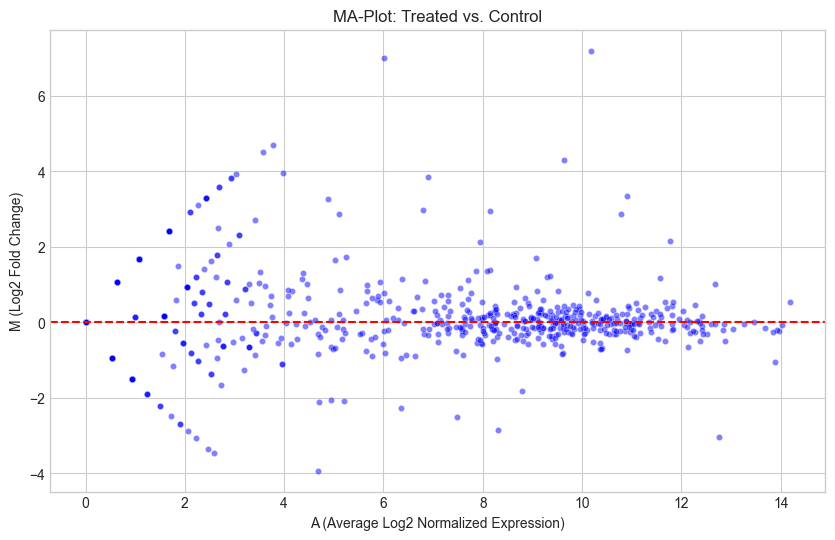

In [15]:
# Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

normalized_df['A_mean_log_2'] = np.log2(normalized_df[['control', 'treated']].mean(axis=1) + 1)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=normalized_df,
    x='A_mean_log_2',
    y='log_2fc',
    alpha=0.5,
    s=20,
    color='blue'
)

plt.axhline(0, color='red', linestyle='--')

plt.xlabel("A (Average Log2 Normalized Expression)")
plt.ylabel("M (Log2 Fold Change)")
plt.title("MA-Plot: Treated vs. Control")
plt.grid(True)

plt.show()


In [ ]:
# 06.10 MB
# Very nice! (1/1)